In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("zomato.csv")
format_string = "schedule%I:%M %p %b %d %Y"
data["formatted_time"] = pd.to_datetime(data["Time"].str.slice(0, -2)+" 2023", format=format_string,errors='coerce')
data = data.dropna(subset=["formatted_time"])
data

,Stock,Comment,Time,Designation,formatted_time
1,Zomato,if next result show 25-50 crore profit...its w...,schedule8:47 PM Sep 15th,Silver Member,2023-09-15 20:47:00
3,Zomato,may close 102 or below....but this companies f...,schedule1:31 PM Oct 3rd,Silver Member,2023-10-03 13:31:00
4,Zomato,can someone share how we can check live delive...,schedule11:44 AM Oct 3rd,New Member,2023-10-03 11:44:00
5,Zomato,Let the world cup starts. It will heads to 140,schedule12:52 PM Sep 26th,New Member,2023-09-26 12:52:00
6,Zomato,"riskyinv: when people hear bad news, theyll tr...",schedule9:45 AM Sep 21st,New Member,2023-09-21 09:45:00
...,...,...,...,...,...
425,Zomato,Sell on rise to 95/96. sell the news whatever ...,schedule9:15 AM Aug 28th,Bronze Member,2023-08-28 09:15:00
426,Zomato,block deat at 90.20 if see above 95 plus book ...,schedule9:15 AM Aug 28th,Bronze Member,2023-08-28 09:15:00
427,Zomato,Most of the comments here are positive but I s...,schedule9:10 AM Aug 28th,Bronze Member,2023-08-28 09:10:00
428,Zomato,rpts suggest co rolled out platform fee of rs ...,schedule9:10 AM Aug 28th,Bronze Member,2023-08-28 09:10:00


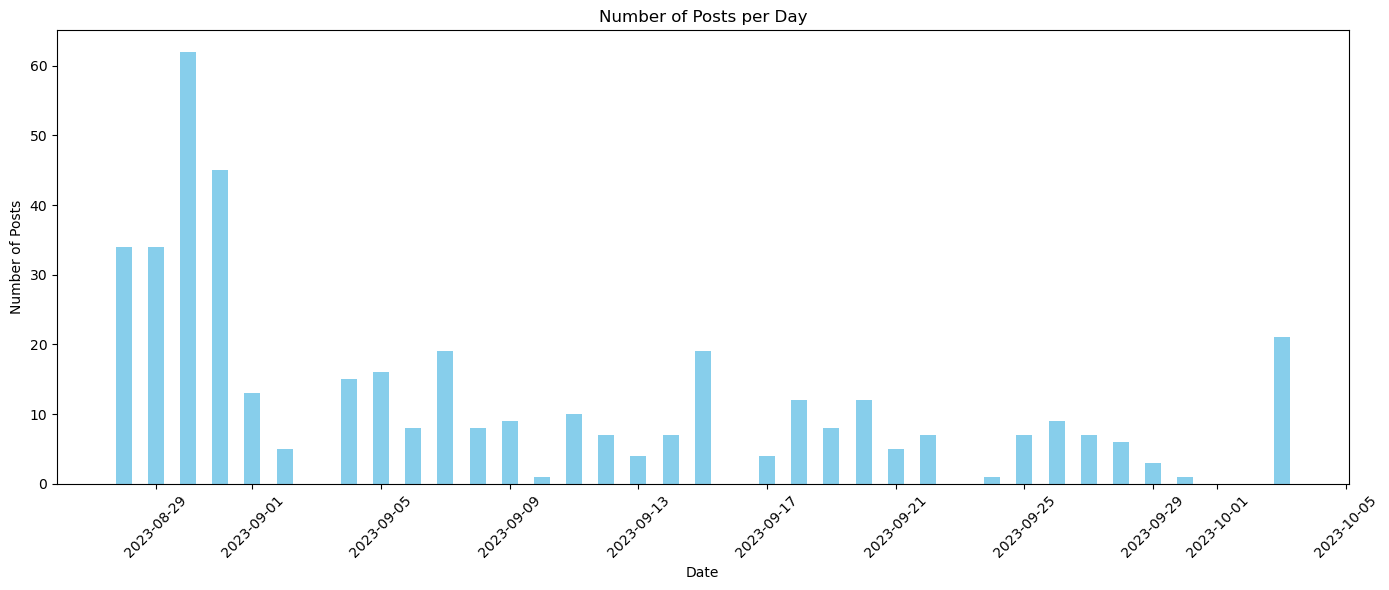

In [3]:
import matplotlib.pyplot as plt

data["date"] = data["formatted_time"].dt.date

# Group the data by date and count the number of posts for each day
post_count_per_day = data.groupby("date").size().reset_index(name="post_count")

# Create a bar chart to visualize the number of posts per day
plt.figure(figsize=(14, 6))  # Increase the figure size to provide more space for x-axis labels
plt.bar(post_count_per_day["date"], post_count_per_day["post_count"], width=0.5, color='skyblue')
plt.title("Number of Posts per Day")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)  # Rotate x-axis labels by 90 degrees for vertical labels
plt.tight_layout()
plt.show()

In [4]:
# import pandas as pd
# import torch
# from transformers import BertTokenizer, BertModel
# from sklearn.metrics.pairwise import cosine_similarity
# import re

# def clean_and_tokenize(text):
#     # Remove special characters, punctuation, and extra whitespaces
#     cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
#     cleaned_text = ' '.join(cleaned_text.split())
#     return cleaned_text

# # Clean and tokenize the "Comment" column
# data['Cleaned_Comment'] = data['Comment'].apply(clean_and_tokenize)

# # Load the pre-trained BERT model and tokenizer
# model_name = "bert-base-uncased"
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertModel.from_pretrained(model_name)

# # Set the model to evaluation mode
# model.eval()

# # Function to calculate cosine similarity using BERT embeddings
# def calculate_bert_cosine_similarity(comment, word):
#     # Tokenize the comment and word
#     tokenized_comment = tokenizer.encode(comment, add_special_tokens=True, truncation=True, padding=True, return_tensors="pt")
#     tokenized_word = tokenizer.encode(word, add_special_tokens=True, truncation=True, padding=True, return_tensors="pt")
    
#     # Get BERT embeddings for the comment and word
#     with torch.no_grad():
#         comment_embedding = model(tokenized_comment).last_hidden_state.mean(dim=1)
#         word_embedding = model(tokenized_word).last_hidden_state.mean(dim=1)
    
#     # Calculate cosine similarity
#     similarity_score = torch.cosine_similarity(comment_embedding, word_embedding).item()
    
#     return similarity_score

# # Clean and tokenize the "Comment" column (replace this with your cleaning code)
# # Example:
# # data['Cleaned_Comment'] = data['Comment'].apply(clean_and_tokenize)

# # Define the word to compare
# word_to_compare = "Sell"

# # Calculate cosine similarity for each cleaned comment and create a new column
# data['Cosine_Similarity_to_Sell'] = data['Cleaned_Comment'].apply(lambda x: calculate_bert_cosine_similarity(x, word_to_compare))

# # Display the DataFrame with cosine similarity scores
# print(data[['Comment', 'Cosine_Similarity_to_Sell']])

In [5]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import re

nlp = spacy.load('en_core_web_lg')

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Remove special characters, punctuation, and extra whitespaces
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# Clean and tokenize the "Comment" column
data['Cleaned_Comment'] = data['Comment'].apply(clean_and_tokenize)

# Function to calculate cosine similarity
def calculate_cosine_similarity(comment,word):
    word_embedding=nlp(word).vector
    comment_embedding = nlp(comment).vector
    similarity_score = cosine_similarity([comment_embedding], [word_embedding])[0][0]
    return similarity_score

word_to_compare="Sell"
data['Cosine_Similarity_to_Sell'] = data['Cleaned_Comment'].apply(lambda x: calculate_cosine_similarity(x, word_to_compare))

word_to_compare="Buy"
data['Cosine_Similarity_to_Buy'] = data['Cleaned_Comment'].apply(lambda x: calculate_cosine_similarity(x, word_to_compare))


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment

# Apply the sentiment analysis function to each row in the "Cleaned_Comment" column
data['Sentiment_Scores'] = data['Cleaned_Comment'].apply(get_sentiment_scores)

# Extract the sentiment scores
data['Compound_Score'] = data['Sentiment_Scores'].apply(lambda x: x['compound'])
data.drop(['Sentiment_Scores'], axis=1,inplace=True)
# Print the DataFrame with sentiment scores

In [7]:
import yfinance as yf
rel = yf.Ticker("ZOMATO.NS")
df = rel.history(interval='1h', start=min(data["date"]), end=max(data["date"]))
df.reset_index(inplace=True)

In [8]:
from datetime import timedelta
import pandas as pd
import sqlite3

# Assuming df and data are your dataframes
# Convert the Datetime column to datetime objects if it's not already done
df['Datetime'] = pd.to_datetime(df['Datetime'])
data['formatted_time'] = pd.to_datetime(data['formatted_time'])

# Define a function to calculate the time range for each row in df
def calculate_time_range(row):
    start_time = row['Datetime'] - timedelta(hours=4)
    end_time = row['Datetime'] - timedelta(hours=1)
    return start_time, end_time

# Apply the function to create new columns in df
df['start_time'], df['end_time'] = zip(*df.apply(calculate_time_range, axis=1))

conn = sqlite3.connect(':memory:')
#write the tables
df.to_sql('df', conn, index=False)
data.to_sql('data', conn, index=False)

qry = '''
    select * from df a
    inner join
    data b
    on b.formatted_time>=a.start_time and b.formatted_time<a.end_time
    '''
result = pd.read_sql_query(qry, conn)

In [9]:
seniority_mapping = {
    'New Member': 1,
    'Bronze Member': 2,
    'Silver Member': 3,
    'Gold Member': 4,
    'Platinum Member': 5
}

# Map the seniority levels to numbers and create a new integer column
result['seniority_number'] = result['Designation'].map(seniority_mapping)

In [50]:
agg_result = result.groupby('Datetime').agg({
    'Open': 'max',
    'seniority_number': 'mean',
    'Cosine_Similarity_to_Sell': 'mean',
    'Cosine_Similarity_to_Buy': 'mean',
    'Compound_Score': 'mean',
    'Low': 'count'
}).reset_index()
agg_result.rename(columns={'Low': 'Row_Count'}, inplace=True)

In [51]:
import numpy as np
agg_result.sort_values(by='Datetime', inplace=True)

# Calculate the difference between 'open' and 'open' of the previous row
agg_result['open_difference'] = (agg_result['Open'] - agg_result['Open'].shift(1))/ (agg_result['Open'].shift(1))
agg_result = agg_result.drop(0)
# Reset the index if needed
agg_result.reset_index(drop=True, inplace=True)

# Display the DataFrame
agg_result['encoded_column'] = np.where(agg_result['open_difference'] > 0, 1, 0)
agg_result['momentum']=agg_result['open_difference'].shift(1)
agg_result = agg_result.drop(0)

lower_level=pd.merge(result,agg_result[["Datetime","encoded_column", "momentum"]],on="Datetime")
agg_result.drop(['Datetime','Open','open_difference'], axis=1,inplace=True)

columns_to_keep = [col for col in agg_result.columns if col != 'Row_Count']
lower_level = lower_level[columns_to_keep].copy()

In [52]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from xgboost import XGBClassifier
from itertools import product
from tqdm import tqdm 

def xgboosting(X_train,y_train,cv):
    # Define the hyperparameters to search over
    param_grid_xgb = {
        'n_estimators': [50, 100, 200,500],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'min_child_weight': [1, 2],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.6, 0.7, 0.8],
        'gamma': [0.0, 0.1, 0.2],
    }

    param_combinations_xgb = list(product(*param_grid_xgb.values()))

    cv_scores = []

    for params in tqdm(param_combinations_xgb, desc="Hyperparameter Combinations", unit="combination"):
        model = XGBClassifier(**dict(zip(param_grid_xgb.keys(), params)))
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_scores.append(scores.mean())

    best_params = param_combinations_xgb[np.argmax(cv_scores)]
    best_model = XGBClassifier(**dict(zip(param_grid_xgb.keys(), best_params)))
    return [max(cv_scores),best_model]
    

In [53]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes(X_train,y_train,cv):
    naive_bayes_model = GaussianNB()
    
    for _ in tqdm(range(1), desc="Naive Bayes", unit="combination"):  # Loop runs only once for Naive Bayes
        scores_nb = cross_val_score(naive_bayes_model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_scores_nb=scores_nb.mean()

    best_model = GaussianNB()
    return [cv_scores_nb,best_model]

In [54]:
from sklearn.linear_model import LogisticRegression

def LogReg(X_train,y_train,cv):
    # Define the hyperparameters to search over
    param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    param_combinations_lr = list(product(*param_grid_logistic.values()))

    cv_scores = []

    for params in tqdm(param_combinations_lr, desc="Hyperparameter Combinations", unit="combination"):
        model = LogisticRegression(**dict(zip(param_grid_logistic.keys(), params)))
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_scores.append(scores.mean())

    best_params = param_combinations_lr[np.argmax(cv_scores)]
    best_model = LogisticRegression(**dict(zip(param_grid_logistic.keys(), best_params)))
    return [max(cv_scores),best_model]
    

In [55]:
from sklearn.tree import DecisionTreeClassifier

def DecisionTree(X_train, y_train, cv):
    # Define the hyperparameters to search over
    param_grid_decision_tree = {
        'max_depth': [None,3,5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    param_combinations_dt = list(product(*param_grid_decision_tree.values()))

    cv_scores = []

    for params in tqdm(param_combinations_dt, desc="Decision Tree Hyperparameter Combinations", unit="combination"):
        model = DecisionTreeClassifier(**dict(zip(param_grid_decision_tree.keys(), params)))
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_scores.append(scores.mean())

    best_params = param_combinations_dt[np.argmax(cv_scores)]
    best_model = DecisionTreeClassifier(**dict(zip(param_grid_decision_tree.keys(), best_params)))
    return [max(cv_scores), best_model]

In [69]:
user_selection=[1,2,3,4]

In [70]:
X = agg_result.drop(columns=['encoded_column'])
y = agg_result['encoded_column']

cv = TimeSeriesSplit(n_splits=5)

n_samples = len(X)
n_test = int(0.25 * n_samples)

X_train, X_test = X[:-n_test], X[-n_test:]
y_train, y_test = y[:-n_test], y[-n_test:]
cv_scores=[]
model_objects=[]
algos=[]
for i in range(1,5):
    if i in user_selection:
        if i==1:
            cv_score,model=DecisionTree(X_train,y_train,cv)
            cv_scores.append(cv_score)
            model_objects.append(model)
            algos.append("Decision Trees Classifier")
        if i==2:
            cv_score,model=naive_bayes(X_train,y_train,cv)
            cv_scores.append(cv_score)
            model_objects.append(model)
            algos.append("Naive Bayes Classifier")
        if i==3:
            cv_score,model=LogReg(X_train,y_train,cv)
            cv_scores.append(cv_score)
            model_objects.append(model)
            algos.append("Logistic Regression Classifier")
        if i==4:
            cv_score,model=xgboosting(X_train,y_train,cv)
            cv_scores.append(cv_score)
            model_objects.append(model)
            algos.append("XGBoost Classifier")

print(f"Best model in cross validation - {algos[cv_scores.index(max(cv_scores))]}")
print(f"Best cross validation accuracy score - {max(cv_scores)}")

best_model=model_objects[cv_scores.index(max(cv_scores))].fit(X_train,y_train)

Hyperparameter Combinations: 100%|████████████████████████████████████████| 1944/1944 [07:30<00:00,  4.31combination/s]

Best model in cross validation - XGBoost Classifier
Best cross validation accuracy score - 0.6


Accuracy: 0.40
Baseline Accuracy: 0.53


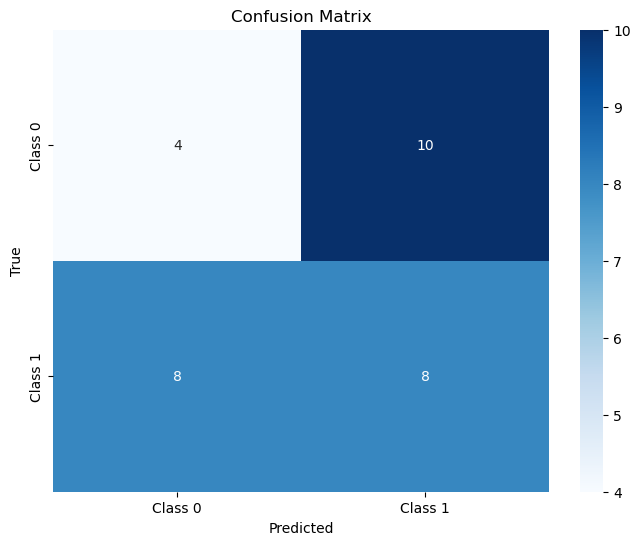

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

y_pred = best_model.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy:.2f}")
baseline_accuracy = (y_test == y_test.value_counts().idxmax()).mean()
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

# Plot the confusion matrix as a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()